In [1]:
!nvidia-smi #make sure that we have access to GPU

Tue Sep 30 14:56:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

from IPython.display import Image

In [3]:
!pip install inference-sdk -q #install inference-sdk


import supervision as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00


In [4]:
# Install YOLO

!pip install -U ultralytics==8.3.2 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.2 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [9]:
# Install Roboflow

!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.5 MB/s eta 0:00:00


In [ ]:
# download datasets created in Roboflow

HOME = os.getcwd()
!mkdir -p {HOME}/datasets #create directory for datasets
%cd {HOME}/datasets


rf = Roboflow(api_key="YOUR_API_KEY") #enter your API-key
project = rf.workspace("ivm").project("tumor-microenvironment-tomte")
version = project.version(11)
dataset = version.download("yolov11") #download dataset

/content/datasets/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-microenvironment-11 in yolov11:: 100%|██████████| 1428/1428 [00:00<00:00, 2375.95it/s]


# Train your model

In [7]:

%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800


/content
100% 18.4M/18.4M [00:00<00:00, 238MB/s]
New https://pypi.org/project/ultralytics/8.3.203 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.2 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Tumor-microenvironment-11/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

# Visualize training results

/content


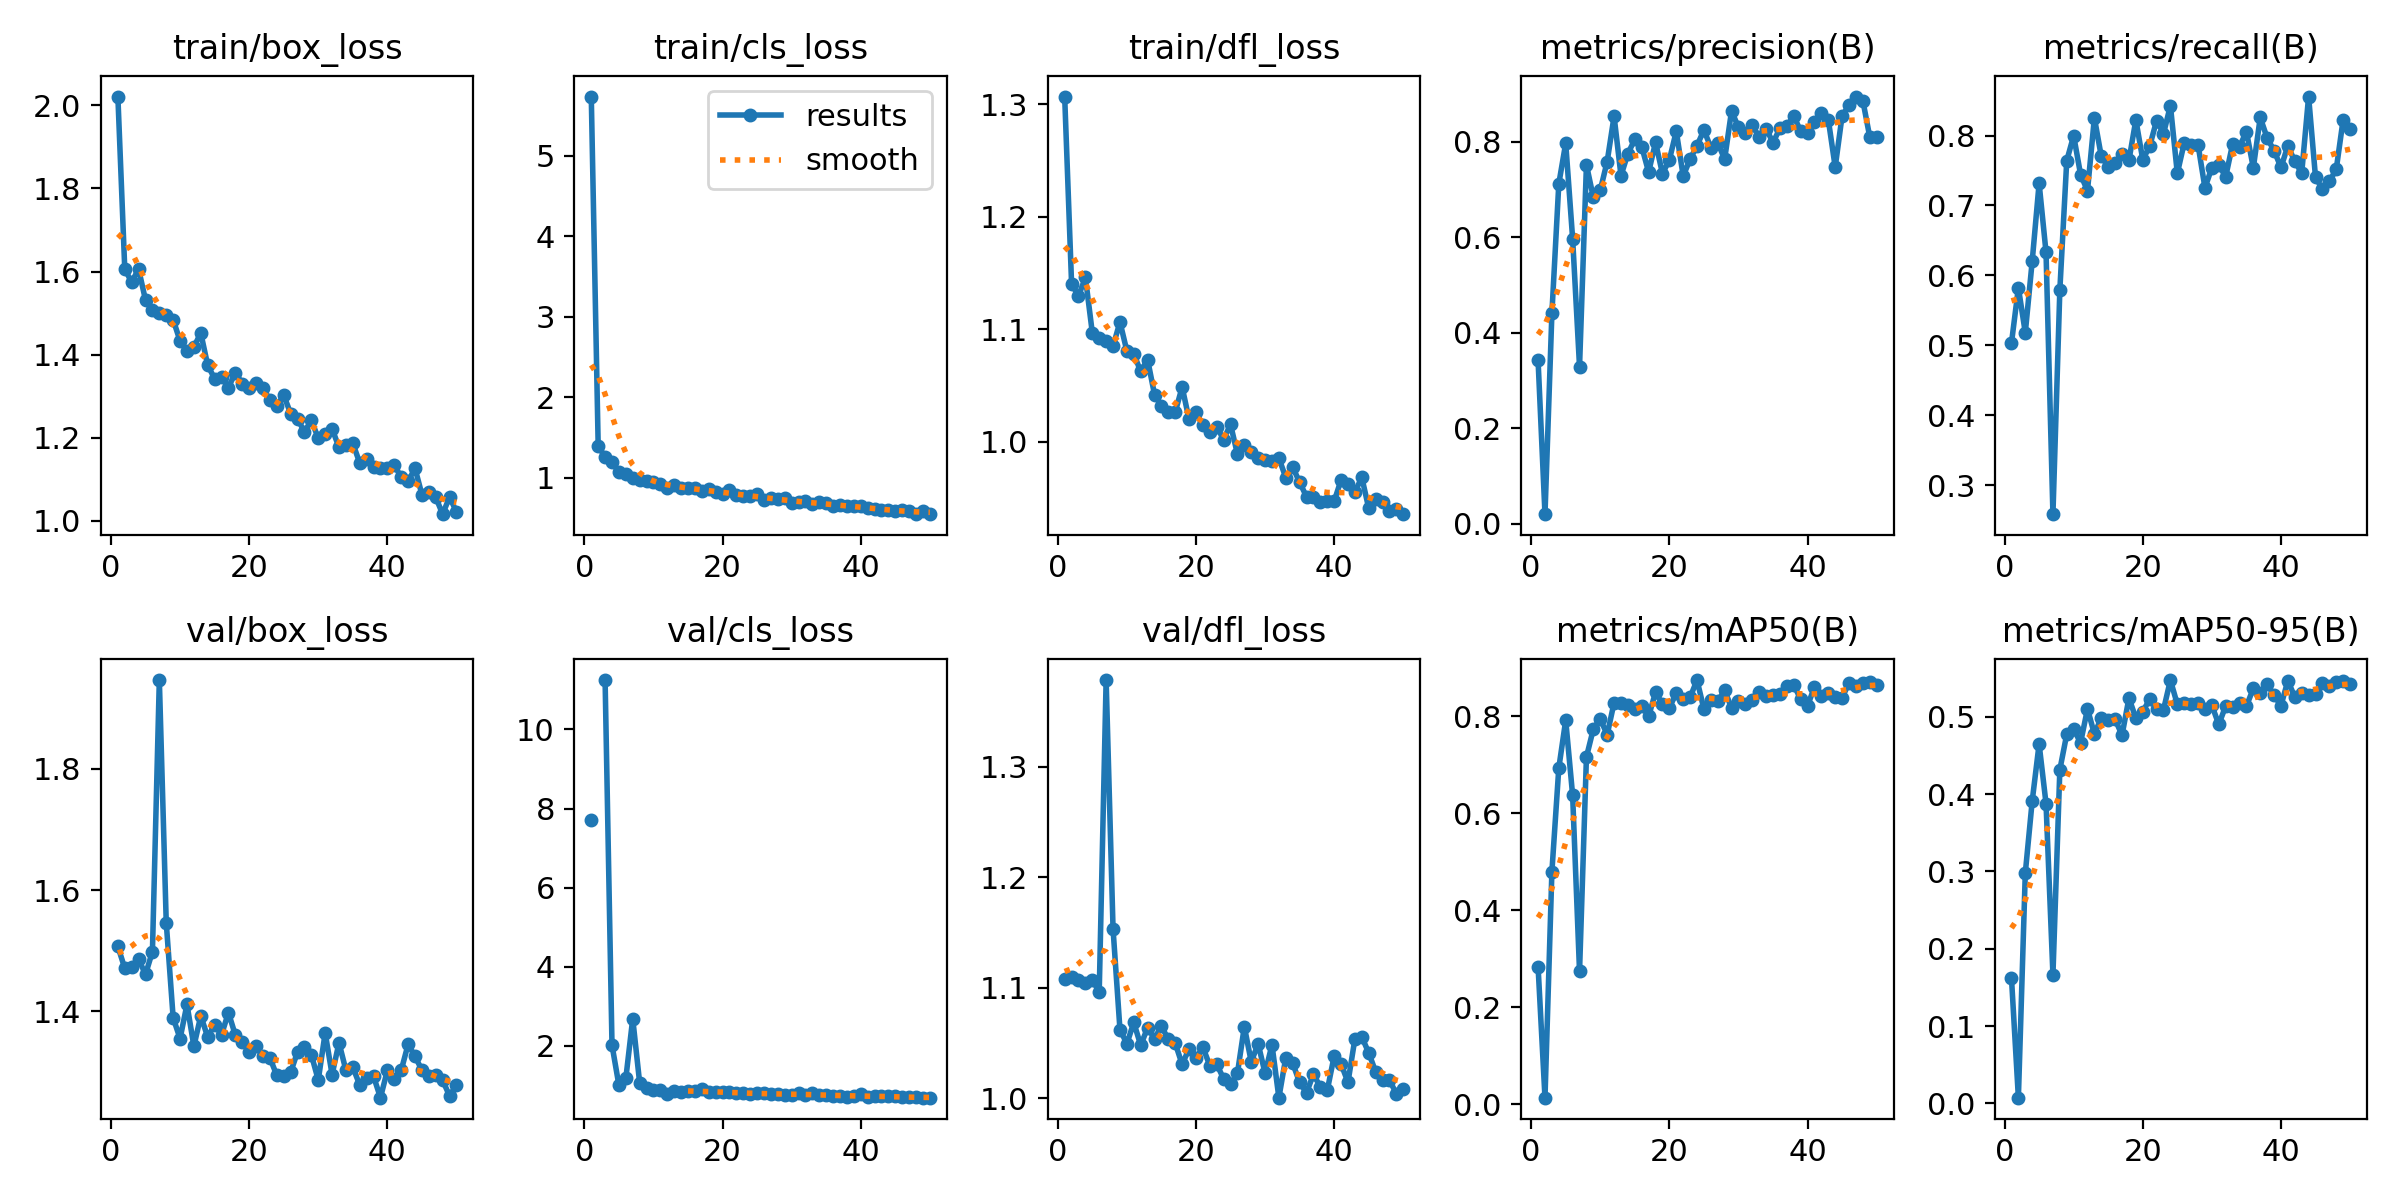

In [8]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validate Your Model

In [9]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.2 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Tumor-microenvironment-11/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.59it/s]
                   all         56        182      0.798      0.849      0.876       0.55
                   CD8         48        124      0.937      0.863       0.96      0.643
              pericyte         18         58       0.66      0.835      0.791      0.456
Speed: 10.3ms preprocess, 16.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ult

## Inference

##### Best weights were saved on RF platform under model_id="tumor-microenvironment-tomte/11"; one can use it with **their own API-key** and inference-sdk (see below)

In [ ]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient, InferenceConfiguration


# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="YOUR_API_KEY" #enter your API-key
)

custom_configuration = InferenceConfiguration(confidence_threshold=0.5) #decide which threshold to use

### Compare manual vs model segmentation

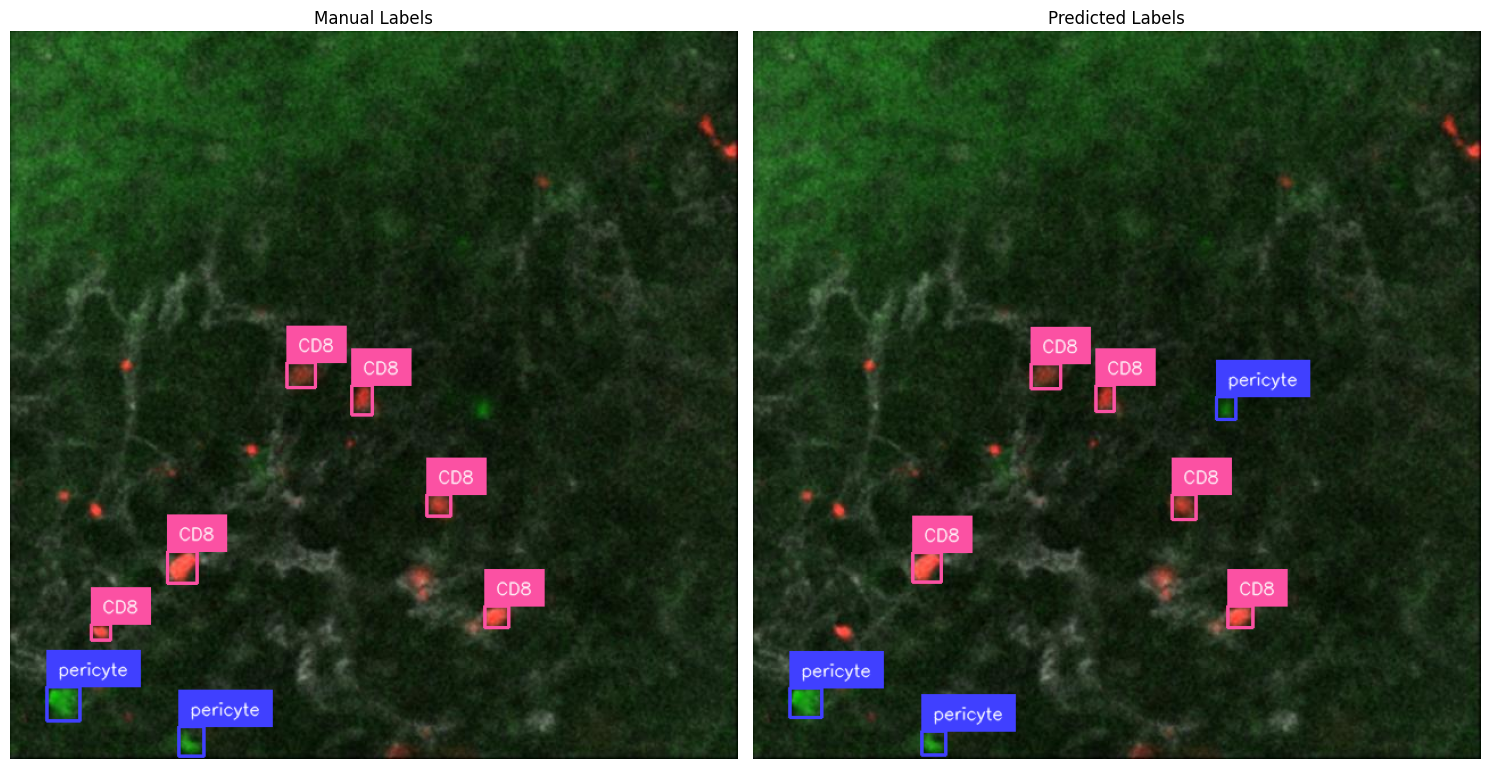

In [14]:
# Create function to convert YOLO format to Supervision Detections
def yolo_to_supervision_detections(yolo_labels_path, image_width, image_height):
    detections = sv.Detections.empty()
    with open(yolo_labels_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue # Skip incomplete lines

            class_id = int(parts[0])
            # Extract polygon points if available, otherwise assume bounding box
            if len(parts) > 5:
                # Assuming polygon format: class_id x1 y1 x2 y2 ...
                polygon_points = np.array(list(map(float, parts[1:]))).reshape(-1, 2)
                # Convert normalized polygon points to absolute coordinates
                polygon_points[:, 0] *= image_width
                polygon_points[:, 1] *= image_height
                # Calculate bounding box from polygon
                x_min = np.min(polygon_points[:, 0])
                y_min = np.min(polygon_points[:, 1])
                x_max = np.max(polygon_points[:, 0])
                y_max = np.max(polygon_points[:, 1])

            else:
                # Assuming bounding box format: class_id x_center y_center width height
                x_center, y_center, width, height = map(float, parts[1:])

                # Convert YOLO format to bounding box coordinates (x_min, y_min, x_max, y_max)
                x_center *= image_width
                y_center *= image_height
                width *= image_width
                height *= image_height

                x_min = x_center - width / 2
                y_min = y_center - height / 2
                x_max = x_center + width / 2
                y_max = y_center + height / 2


            # Create a new Detections object for the current object
            new_detection = sv.Detections(
                xyxy=np.array([[x_min, y_min, x_max, y_max]]),
                class_id=np.array([class_id]),
                confidence=np.array([1.0]) # Assuming confidence is 1.0 for ground truth
            )

            # Merge the new detection with the existing detections
            if detections.xyxy.size == 0:
                detections = new_detection
            else:
                detections = sv.Detections.merge([detections, new_detection])


    return detections


images_dir = HOME+'/datasets/Tumor-microenvironment-11/test/images/'
labels_dir = HOME+'/datasets/Tumor-microenvironment-11/test/labels/'


# Select a random image and its corresponding label file
image_name = random.choice(os.listdir(images_dir))
img_path = images_dir + image_name
label_path = labels_dir + image_name[:-4] + '.txt'

# Read the image to get its dimensions
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
image_height, image_width, _ = img.shape

# Convert YOLO labels to Supervision Detections
real_detections = yolo_to_supervision_detections(label_path, image_width, image_height)

# Define a mapping for class IDs to labels
class_id_to_label = {
    0: "CD8",
    1: "pericyte"
    # Add other class mappings if needed
}


# Create supervision annotators
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Annotate the image with bounding boxes and labels
manually_annotated_image = box_annotator.annotate(
    scene=img.copy(),
    detections=real_detections
)

manually_annotated_image = label_annotator.annotate( # Annotate with labels
    scene=manually_annotated_image,
    detections=real_detections,
    labels=[class_id_to_label.get(class_id, str(class_id)) for class_id in real_detections.class_id] # Use class_id as label
)



# for the same image make prediction with the model
with CLIENT.use_configuration(custom_configuration):
  results = CLIENT.infer(img_path, model_id="tumor-microenvironment-tomte/11") #model_id refers to the best weights saved on RF paltform


# load the results into the supervision Detections api
predicted_detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
model_annotated_image = bounding_box_annotator.annotate(
    scene=img.copy(), detections=predicted_detections)
model_annotated_image = label_annotator.annotate(
    scene=model_annotated_image, detections=predicted_detections)

# vizualize the results
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))
ax[0].imshow(manually_annotated_image)
ax[1].imshow(model_annotated_image)


ax[0].set_title("Manual Labels")
ax[1].set_title("Predicted Labels")


ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()


# Visualize segmentation results on custom image

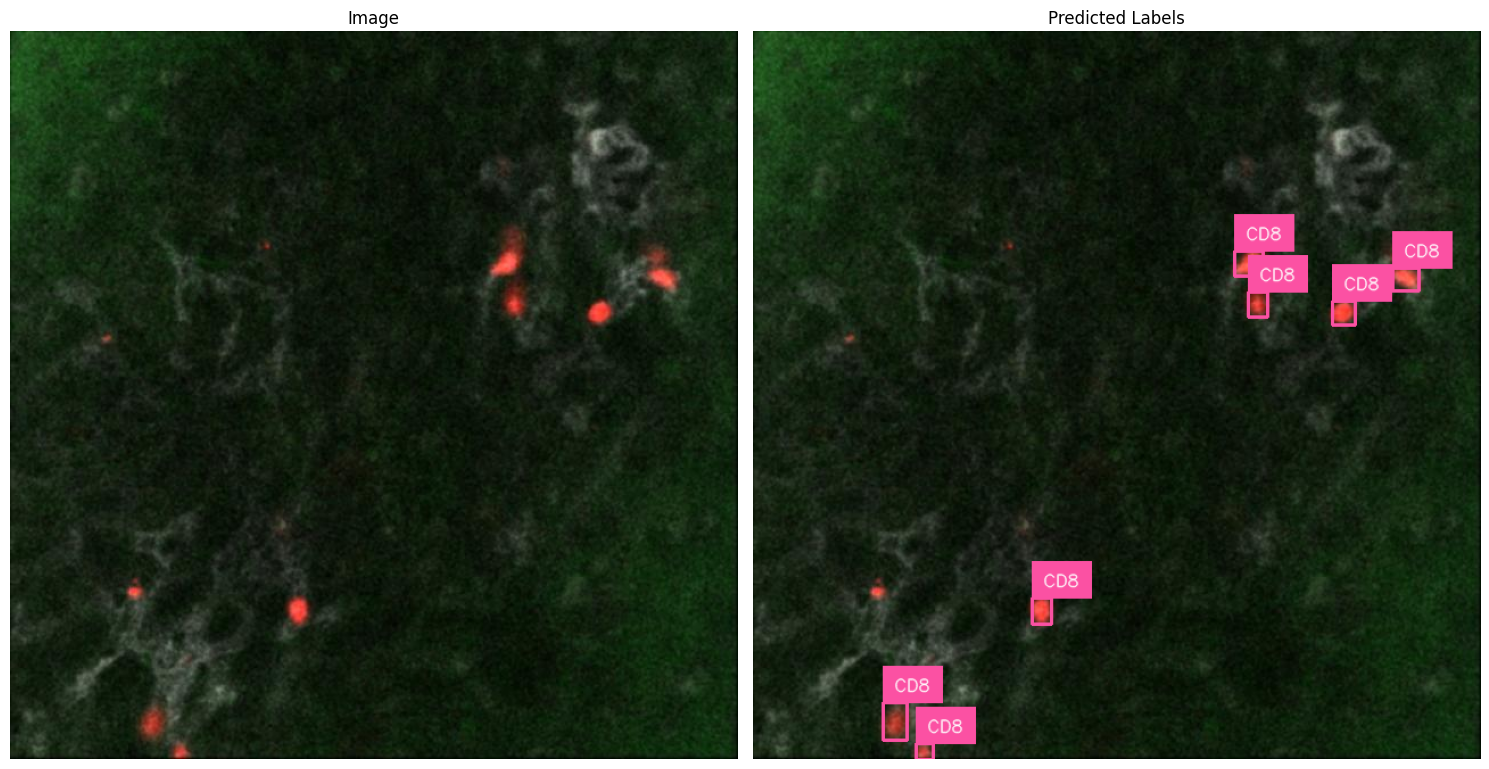

In [51]:
images_dir = HOME+'/datasets/Tumor-microenvironment-11/test/images/' #select your own images dir



# Select a random image
image_name = random.choice(os.listdir(images_dir))
img_path = images_dir + image_name

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) #read image, change colors


# make prediction
with CLIENT.use_configuration(custom_configuration):
  results = CLIENT.infer(img_path, model_id="tumor-microenvironment-tomte/11") #make prediction


# load the results into the supervision Detections api
predicted_detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
model_annotated_image = bounding_box_annotator.annotate(
    scene=img.copy(), detections=predicted_detections)
model_annotated_image = label_annotator.annotate(
    scene=model_annotated_image, detections=predicted_detections)

# vizualize the results
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))
ax[0].imshow(img)
ax[1].imshow(model_annotated_image)


ax[0].set_title("Image")
ax[1].set_title("Predicted Labels")


ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()


# Calculate number of objects for each class

In [49]:
dict = {'filename': [], 'sample': [], 'x': [], 'y': [], 'width': [], 'height': [], 'confidence': [], 'class': []} #create dictionary to assign model predictions

images_dir = HOME+'/datasets/Tumor-microenvironment-11/test/images/' #select your own images dir

for file in sorted(os.listdir(images_dir)): #iterate over images

  with CLIENT.use_configuration(custom_configuration):
      result = CLIENT.infer(f'{images_dir}/{file}', model_id="tumor-microenvironment-tomte/11") #make prediction


  if result['predictions'] == []: #in case no objects are detected on selected image
      dict['filename'].append(file[-63:-44]) #adjust slicing to get reaasonable file name
      dict['sample'].append(file[-63:-51]) #adjust slicing to get reaasonable sample name
      dict['x'].append(np.nan)
      dict['y'].append(np.nan)
      dict['width'].append(np.nan)
      dict['height'].append(np.nan)
      dict['confidence'].append(np.nan)
      dict['class'].append(np.nan)

  else:
        for prediction in result['predictions']:
          dict['filename'].append(file[-63:-44]) #adjust slicing to get reaasonable file name
          dict['sample'].append(file[-63:-51]) #adjust slicing to get reaasonable sample name
          dict['x'].append(prediction['x']) #x, y, width and height are used to draw bounding boxes
          dict['y'].append(prediction['y'])
          dict['width'].append(prediction['width'])
          dict['height'].append(prediction['height'])
          dict['confidence'].append(prediction['confidence']) #model confidence
          dict['class'].append(prediction['class']) #1 of 2 classes: pericyte or CD8


df = pd.DataFrame(dict) #create DataFrame from dictionary

df.head(2)

,filename,sample,x,y,width,height,confidence,class
0,CD8s_25_-1_1_s01_z3,CD8s_25_-1_1,209.5,19.5,25.0,27.0,0.859288,pericyte
1,CD8s_25_-1_1_s15_z3,CD8s_25_-1_1,479.0,509.5,24.0,25.0,0.796468,pericyte


In [50]:
#create pivot_table to summarize the number of cells of the distinct class for sample (sample may include several images/filenames)
pivot = df.pivot_table(
    values = 'confidence',
    index = 'sample',
    columns = 'class',
    aggfunc= 'count',
    fill_value=0
)

pivot

class,CD8,pericyte
sample,,
CD8s_25_-1_1,0,6
CD8s_25_-1_2,29,10
CD8s_25_-1_3,7,0
CD8s_25_-2_1,2,1
CD8s_25_-2_5,3,0


### These results can be used for statistical analysis based on experimental groups